# U.S. Medical Insurance Costs

##### Given the file insurance.csv we want to find the impact that *region* has on how much you pay for insurance. We'll start by answering the following question:
- Which region pays the most insurance cost on average?

In [43]:
#importing needed modules
import csv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


In [44]:
#function section 

def sort_by_region(mixed_lst):
    '''This function takes a list of dictionaries and sorts the list into four lists by region'''
    ne = []
    nw = []
    se = []
    sw = []
    
    for i in mixed_lst:
        if i["Region"] == 'northeast':
            ne.append(i)
        elif i["Region"] == 'northwest':
            nw.append(i)
        elif i["Region"] == 'southwest':
            sw.append(i)
        elif i["Region"] == 'southeast':
            se.append(i)
    return (ne,nw,se,sw)



def find_average_cost(lst):
    '''This function takes a list of dictionaries and returns an integer of the average cost of the 
    list'''
    total_cost = 0
    
    for i in lst:
        total_cost += float(i["Costs"])

    average_cost = (total_cost/ len(lst))
    return round(average_cost, 2)



def find_percentage_smokers(lst):
    '''This function takes a list of dictionaries and returns an integer after counting the number of 
    smokers in it'''
    smoker_count = 0
    
    for i in lst:
        if i["Smoker"] == 'yes':
            smoker_count += 1
    
    smoke_perc = smoker_count/len(lst) * 100
    return smoker_count
    
    

def obesity_perc(lst):
    '''This function takes a list of dictionaries and returns the percentage of underweight, normal,
    overweight, obese, and extremely obese using this generic scale:
    underweight = 0-18.5
    normal = 18.5-24.9
    overweight = 25-29.9
    obese = 30-34.9
    extremely obese = 35 and up'''
    
    under = []
    normal = []
    over = []
    obese = []
    ex_obese = []
    
    for i in lst:
        if float(i["BMI"]) < 18.5:
            under.append(i)
        elif float(i["BMI"]) >= 18.5 and float(i["BMI"]) < 25:
            normal.append(i)
        elif float(i["BMI"]) >= 25 and float(i["BMI"]) < 30:
            over.append(i)
        elif float(i["BMI"]) >= 30 and float(i["BMI"]) < 35:
            obese.append(i)
        else:
            ex_obese.append(i)
            
    under_perc = len(under)/len(lst) * 100
    norm_perc = len(normal)/len(lst) * 100
    over_perc = len(over)/len(lst)*100
    obese_perc = len(obese)/len(lst) *100
    ex_obe_perc = len(ex_obese)/len(lst)*100
    
    return [round(under_perc,2), round(norm_perc,2), round(over_perc,2), round(obese_perc,2), round(ex_obe_perc,2)]

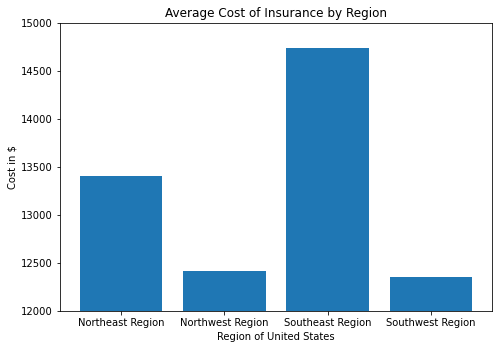

In [45]:
#opening assigned file and sorting it into a dictionary using csv module
f = open("insurance.csv","r")
fdict = csv.DictReader(f)

region_cost = []

north_east = []
north_west = []
south_west = []
south_east = []


#Seperating region and costs into one list of dictionaries
for row in fdict:
    temp_dict = {}
    temp_dict = {"Region": row["region"], "Costs": row["charges"]}
    region_cost.append(temp_dict)
    
#splitting up region_cost dictionary by region function
north_east,north_west, south_east,south_west = sort_by_region(region_cost)

#finding average cost of each region using created function
locations = ["Northeast Region","Northwest Region","Southeast Region","Southwest Region"]
costs = []

costs.append(find_average_cost(north_east))
costs.append(find_average_cost(north_west))
costs.append(find_average_cost(south_east))
costs.append(find_average_cost(south_west))

#plotting findings into a bar graph
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(locations,costs)
plt.title("Average Cost of Insurance by Region")
plt.xlabel("Region of United States")
plt.ylabel("Cost in $")
plt.ylim(12000,15000)
plt.show()
f.close()

##### As we can see the southeast region pays on average almost 1000 dollars more than the northeast and 2000 dollars more than the northwest and southwest regions. There can be mutiple factors as to why this happens so we will try and find the biggest contributor to why this is.

- We will first take a look at the impact of smoking on each region by answering the question:
    - What percentage of each region smokes?

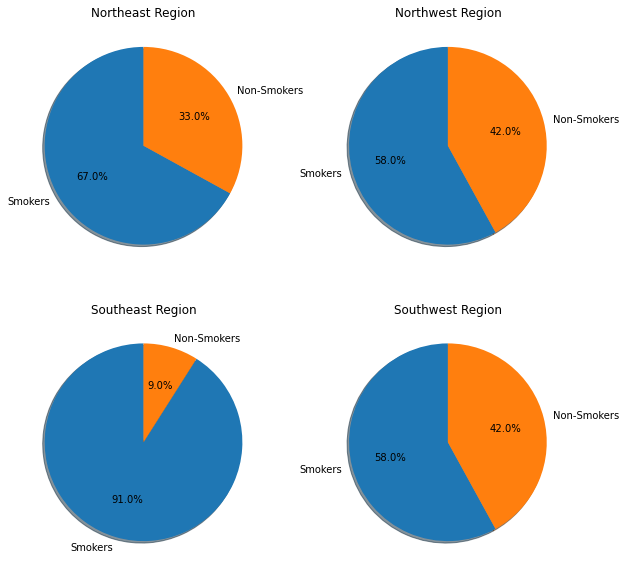

In [46]:
#opening file and initializing lists
f = open("insurance.csv","r")
fdict = csv.DictReader(f)

smoking = []
ne_smoke = []
nw_smoke = []
se_smoke = []
sw_smoke = []

#iterating through file and smoker/region dictionary to list
for row in fdict:
    temp_dict = {}
    temp_dict = {"Smoker": row["smoker"], "Region": row["region"]}
    smoking.append(temp_dict)

#sorting list of smoking dictionaries by region
ne_smoke, nw_smoke, se_smoke, sw_smoke = sort_by_region(smoking)

#finding percentage of smokers of each region
ne_pie = find_percentage_smokers(ne_smoke)
nw_pie = find_percentage_smokers(nw_smoke)
se_pie = find_percentage_smokers(se_smoke)
sw_pie = find_percentage_smokers(sw_smoke)


#Charting smoking/non-smoking percentage on pie charts
labels = 'Smokers', 'Non-Smokers'
sizes = [ne_pie,100-ne_pie]
sizes2 = [nw_pie,100-nw_pie]
sizes3 = [se_pie, 100-se_pie]
sizes4 = [sw_pie, 100-sw_pie]

fig1, axs = plt.subplots(2,2)
axs[0, 0].pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
axs[0, 0].set_title('Northeast Region')
axs[0, 1].pie(sizes2, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
axs[0, 1].set_title('Northwest Region')
axs[1, 0].pie(sizes3, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
axs[1, 0].set_title('Southeast Region')
axs[1, 1].pie(sizes4, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
axs[1, 1].set_title('Southwest Region')
fig1.set_figheight(10)
fig1.set_figwidth(10)
plt.show()


f.close()

##### From these results one can clearly presume that smoking plays a big factor into why a region pays more for healthcare than others. This is due to the fact that the Southeast region has almost a 25% higher smoker ratio than the next highest region.
-Next we will take a look at how BMI might affect each region

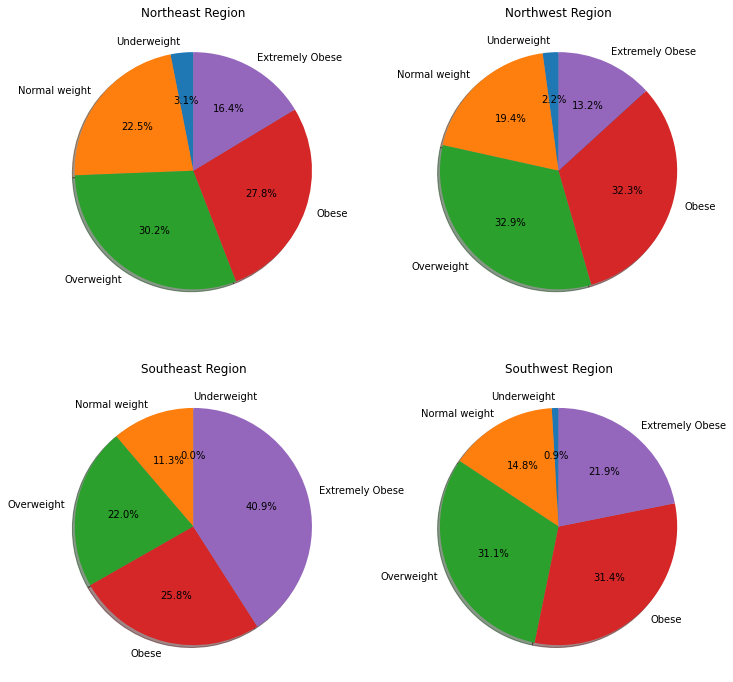

In [47]:
#opening file and making initializing required lists
f = open("insurance.csv","r")
fdict = csv.DictReader(f)


bmi = []
ne_bmi = []
nw_bmi = []
se_bmi = []
sw_bmi = []

#iterating through file and smoker/region dictionary to list
for row in fdict:
    temp_dict = {}
    temp_dict = {"BMI": row["bmi"], "Region": row["region"]}
    bmi.append(temp_dict)

#sorting bmi's by region
ne_bmi, nw_bmi, se_bmi, sw_bmi = sort_by_region(bmi)


#graphing findings on pie charts
labels = ["Underweight", "Normal weight", "Overweight", "Obese", "Extremely Obese"]
obs1 = obesity_perc(ne_bmi)
obs2 = obesity_perc(nw_bmi)
obs3 = obesity_perc(se_bmi)
obs4 = obesity_perc(sw_bmi)

fig2, axs = plt.subplots(2,2)
axs[0, 0].pie(obs1, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
axs[0, 0].set_title('Northeast Region')
axs[0, 1].pie(obs2, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
axs[0, 1].set_title('Northwest Region')
axs[1, 0].pie(obs3, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
axs[1, 0].set_title('Southeast Region')
axs[1, 1].pie(obs4, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
axs[1, 1].set_title('Southwest Region')
fig2.set_figheight(12)
fig2.set_figwidth(12)
plt.show()

f.close()

## Conclusion:
##### From these pie charts of BMIs in each region, we can infer that obesity plays a large part of why the Southeast region pays on average more money for insurance. This is due to the fact that the Southeast region has almost double the percentage of extremely obese people than the next highest region. It does not however, explain why the Northeast region is the second highest cost region. The Northeast region has more normal weight people than any other region so in theory it's costs should be lower. This leads one to the possible conclusion that smoking has more of an effect on insurance costs than obesity